In [1]:
from src import *

## Description

From 50 items recorded over time during a movie session. We look at the connectivity matrices of the items among themselves and plot its connectivity gradients distribution.

GOAL: Gradient of emotion connectome and comparison with affective plot.

## Table of Contents
- [Emotion Connectome](#emotion)

- [Affective Score Comparison](#affective)

In [4]:
emo_df = pd.read_csv('./data/emotion_compile.csv')

In [34]:
# matching valence arousal plot
# shortlist = ["Tense","Nervous", "Upset", "Sad", "Depreseed", "Bored", "Relaxed", "Serene", "Contented", "Happy", "Excited", "Alert"]
# select    = ["Anxiety", "Oppose", "Anger", "Sad", "AtEase", "Calm", "Controlled", "Satisfaction","PleasantSelf", "Love", "Happiness", "Alert"]

movie    = 'W_Sintel13.csv'
movie_df = emo_df[emo_df.filename==movie]
timeseries = [np.array(movie_df[movie_df['item']==e]['score'])
             for e in emo_df.item.unique()]
# timeseries = [np.array(movie_df[movie_df['item']==e]['score'])
            #  for e in select]
timeseries  = np.array(timeseries)

<a class="anchor" id="emotion"></a>
### Emotion Connectome

In [35]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([timeseries.T])[0]

In [36]:
# shift up the correlation matrix : interpretation higher relative correlation when NO correlation than when anti-correlated
pos_corr = correlation_matrix - correlation_matrix.min()
pos_corr = pos_corr / pos_corr.max()

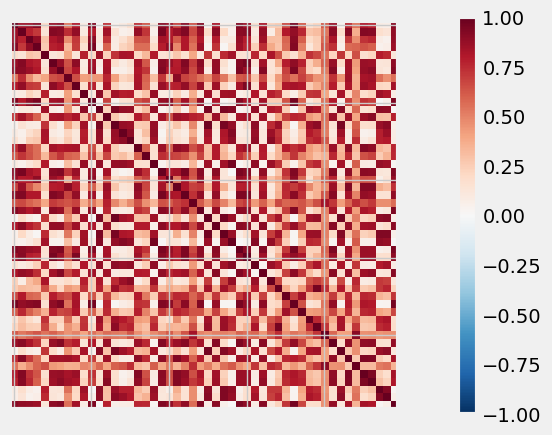

In [37]:
### NOTE: Perhaps do some re-ordering of labels, for now I don't know what to group
# useful for plotting connectivity interactions on glass brain
from nilearn import plotting
corr_plot = plotting.plot_matrix(pos_corr, figure=(5, 5), vmax=1, vmin=-1)

In [40]:
from brainspace.gradient import GradientMaps
emo_g = GradientMaps(n_components=10, approach='dm', kernel='pearson', random_state=10)
emo_g.fit(pos_corr)

GradientMaps(kernel='pearson', random_state=10)

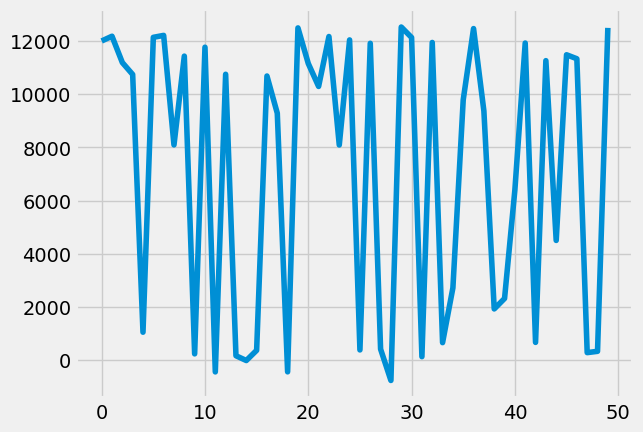

In [50]:
# loadings on principal gradient
plt.plot(np.matmul(emo_g.gradients_[:,0], pos_corr))

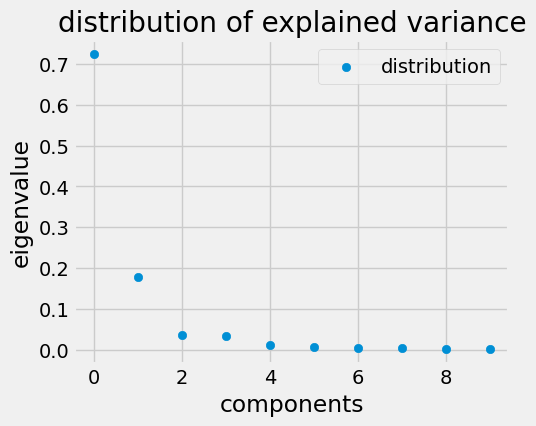

In [41]:
plot_eigenvector_importance(emo_g)

Text(0, 0.5, 'gradient2')

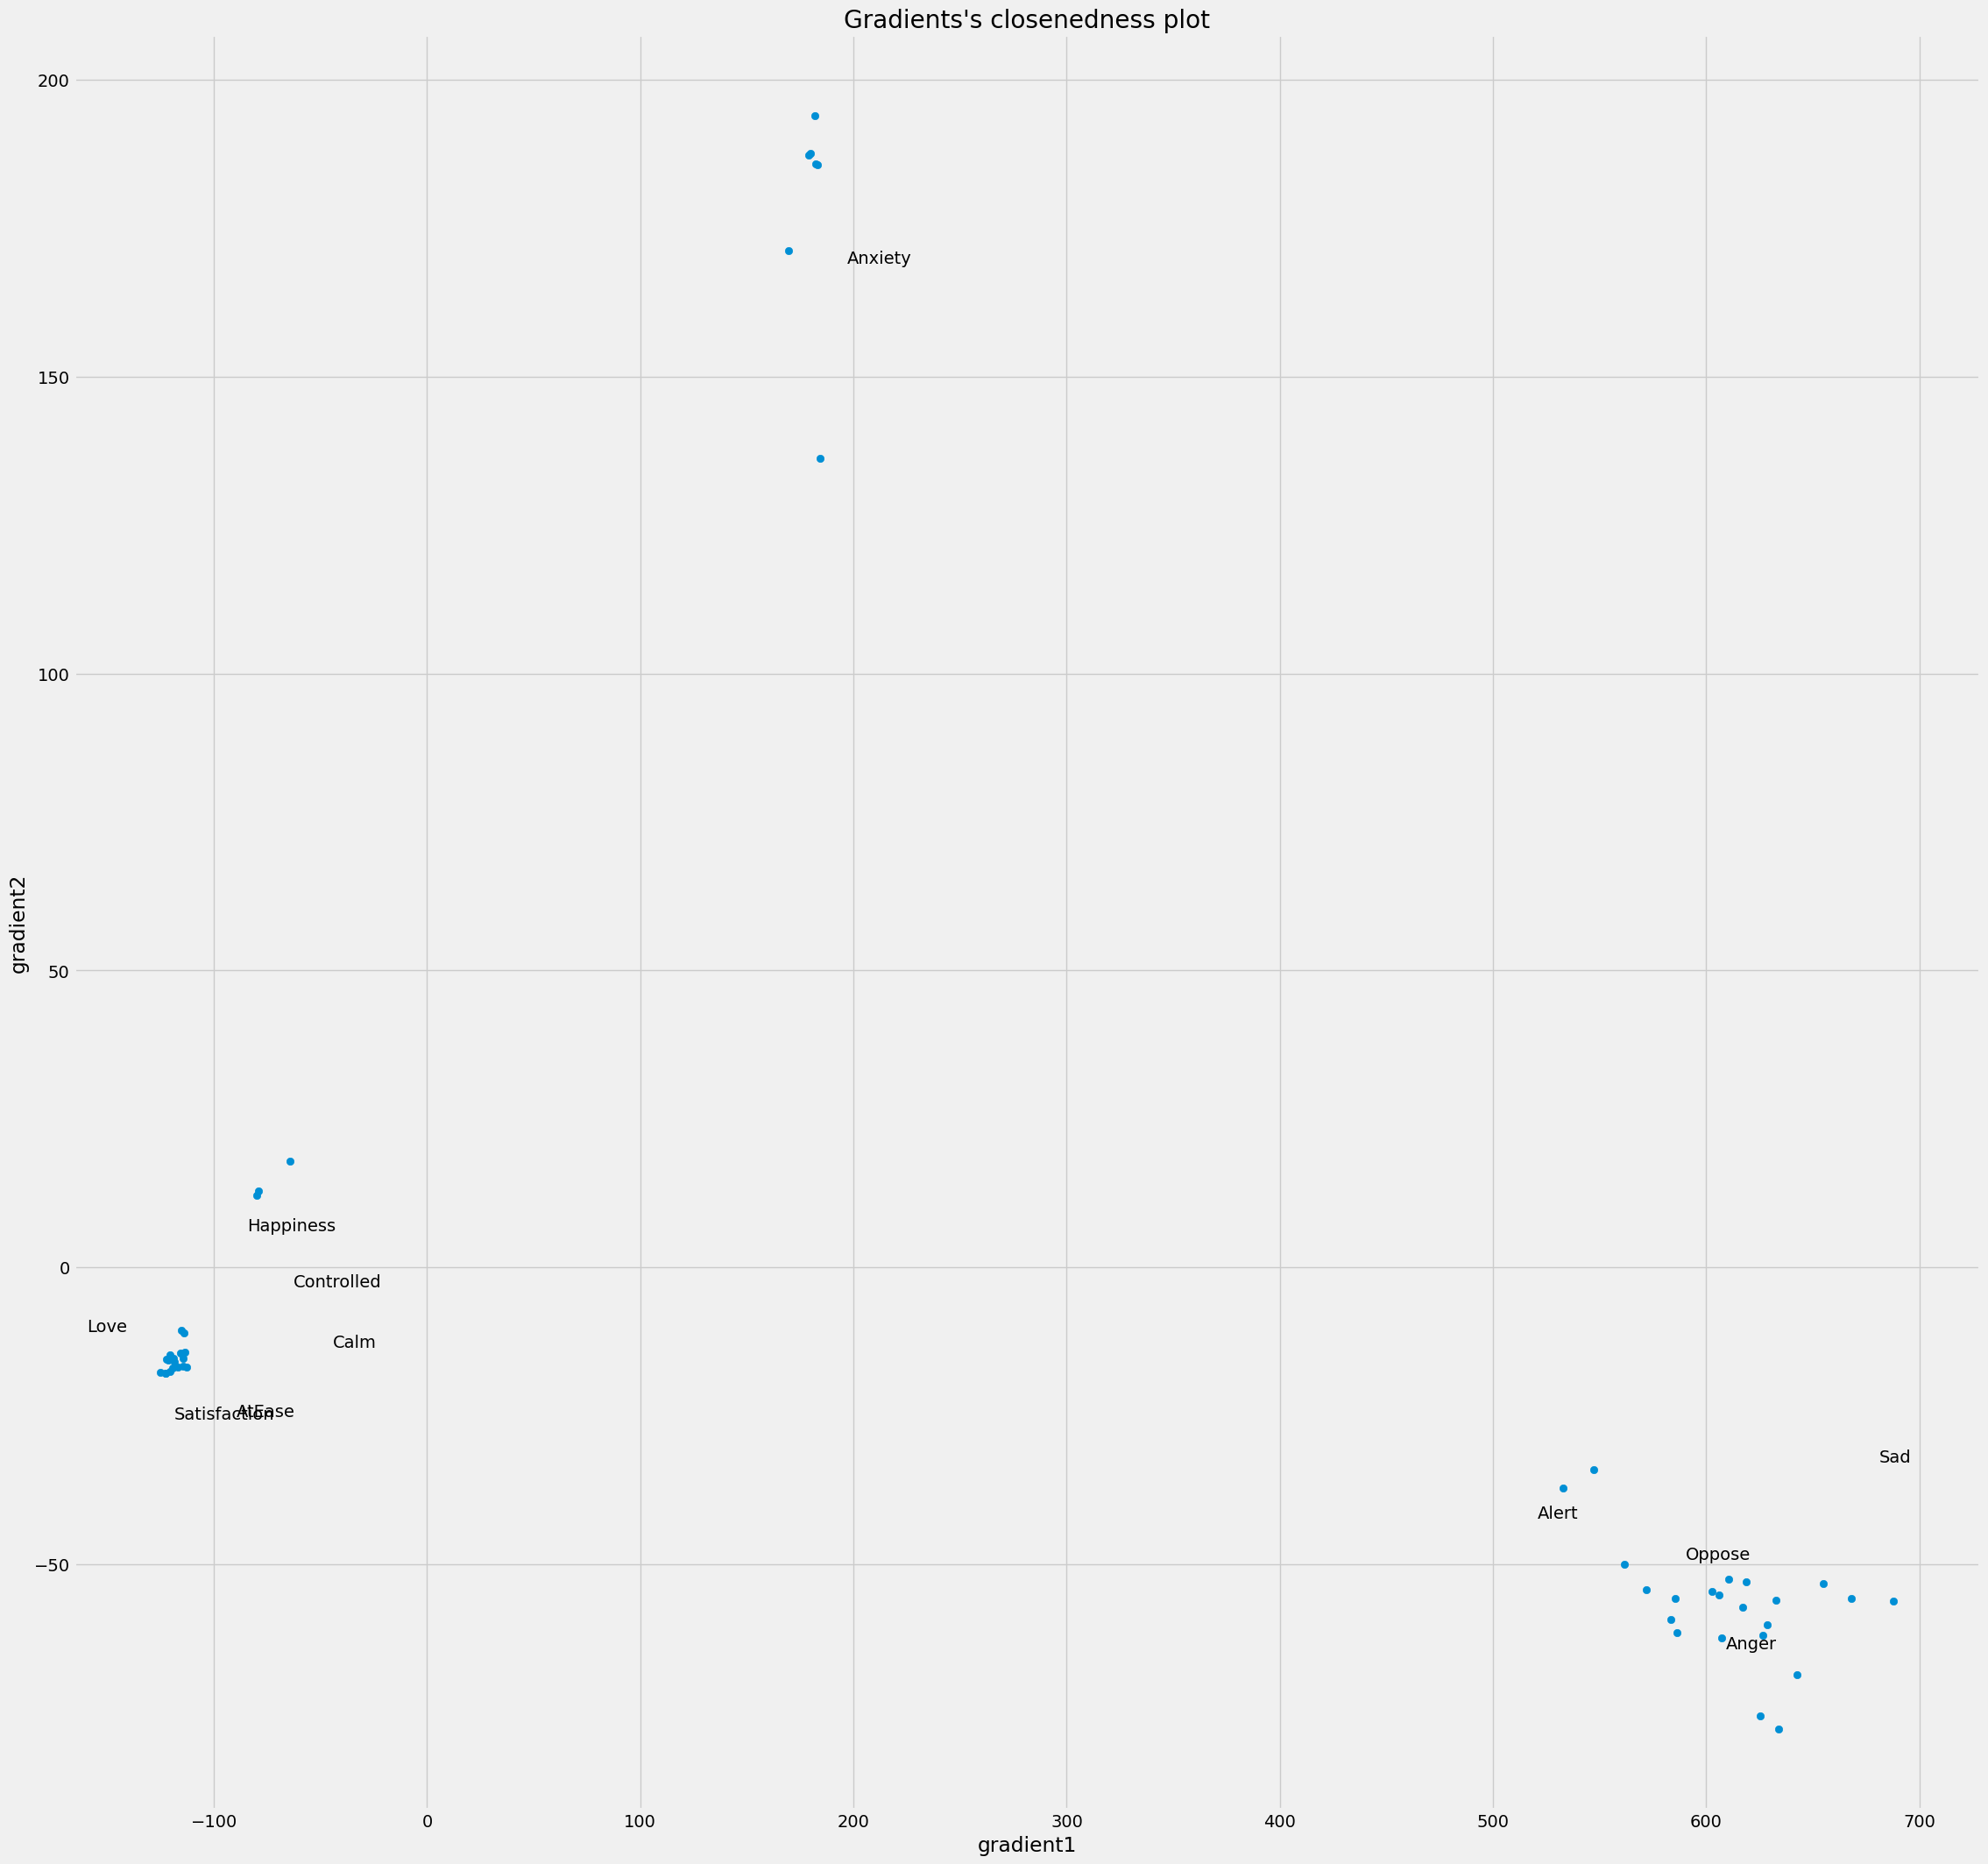

In [42]:
import random 
random.seed(2)
fig, ax = plt.subplots(1,1,figsize=(25,25))
ax.scatter(emo_g.gradients_[:,0], emo_g.gradients_[:,1])

scalerX = emo_g.gradients_[:,0].max()
scalerY = emo_g.gradients_[:,1].max()
for i, txt in enumerate(emo_df.item.unique()):
    if txt not in select: 
        continue
    spacingX = scalerX * (random.random()-0.5)/4
    spacingY = scalerY * (random.random()-0.5)/4
    ax.annotate(txt, (emo_g.gradients_[:,0][i] + spacingX,
                      emo_g.gradients_[:,1][i] + spacingY  ) )

ax.set_title("Gradients's closenedness plot")
ax.set_xlabel("gradient1")
ax.set_ylabel("gradient2")

<a class="anchor" id="affective"></a>
### Affective Score Comparison

(-0.5, 599.5, 531.5, -0.5)

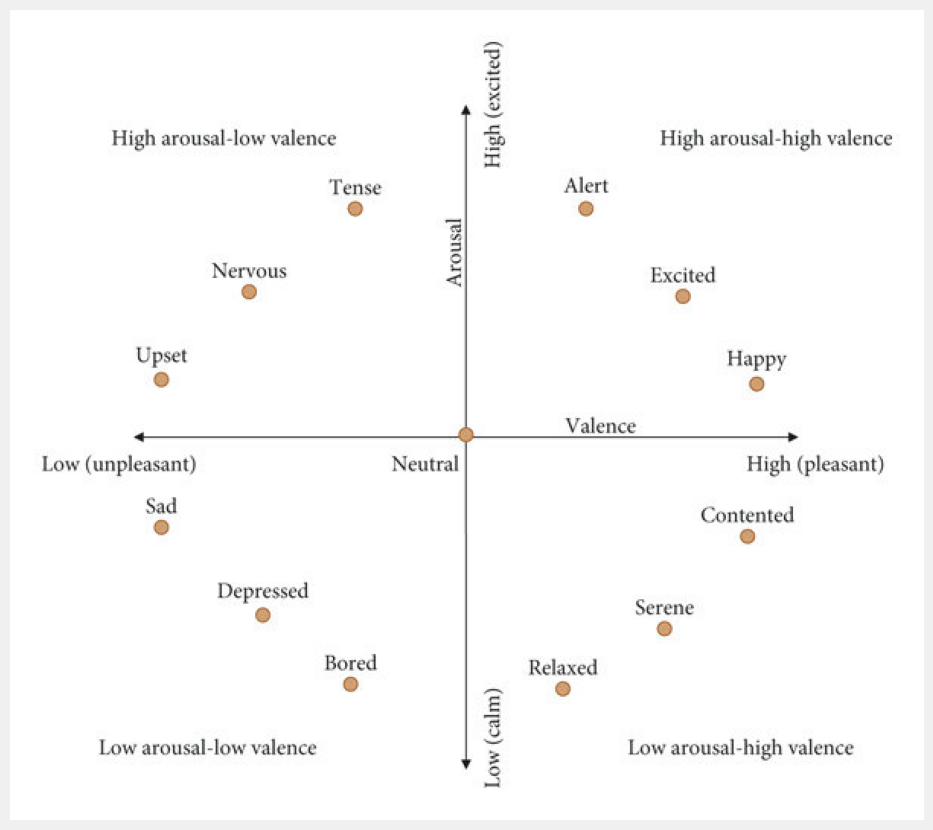

In [22]:
overlay = cv2.imread("./media/emotion_valence_arousal.jpg")
plt.figure(figsize=(25,10))
plt.imshow(overlay)
plt.axis('off')

In [ ]:
# try aligning of overlay scheme 
# and low embed plot